In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.29


In [4]:
t_data=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h_data=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

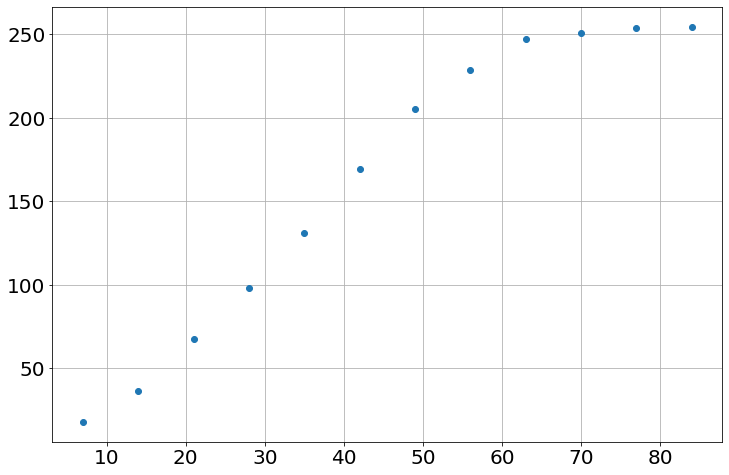

In [5]:
plot(t_data,h_data,'o')

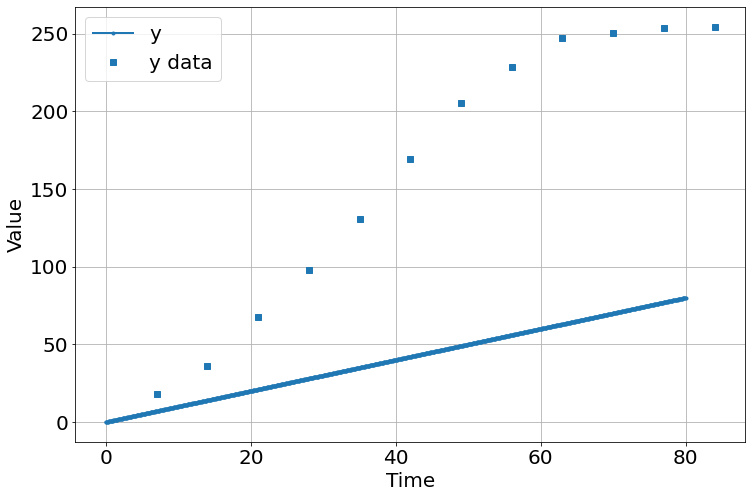

<Figure size 864x576 with 0 Axes>

In [6]:
sim=Simulation()
sim.add("y' = a",0,plot=True)
sim.add_data(t=t_data,y=h_data,plot=True)
sim.params(a=1)
sim.run(80)

In [7]:
from pyndamics3.fit import fit, Parameter

In [8]:
results=fit(sim,
           Parameter("a",value=1,min=0))

In [9]:
results

In [10]:
sim.a

3.5599846140188287

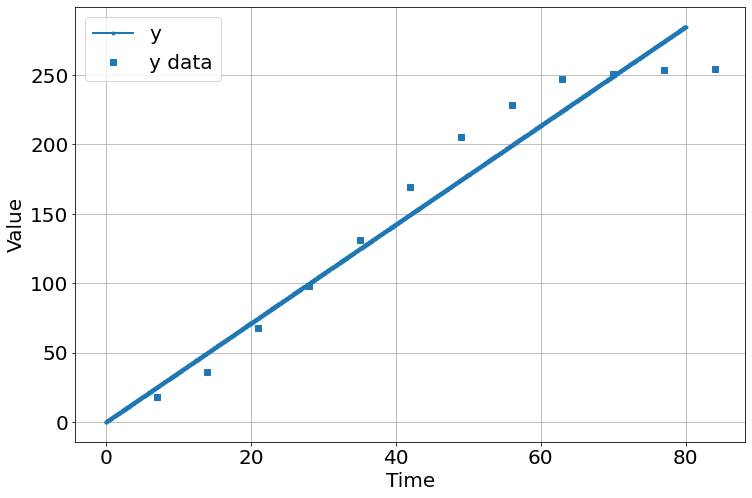

<Figure size 864x576 with 0 Axes>

In [11]:
sim.run(80)